In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
import cPickle as pk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
handle=open('../data/Kenya.pickle','r')
df2=pk.load(handle)
handle.close()

In [5]:
df2.columns

Index([                                      u'activity',
                                        u'basket_amount',
                             u'bonus_credit_eligibility',
                                              u'country',
                                         u'country_code',
                        u'currency_exchange_loss_amount',
                                           u'delinquent',
                                          u'description',
                                        u'funded_amount',
                                          u'funded_date',
                                            u'geo.level',
                                            u'geo.pairs',
                                             u'geo.type',
                                                   u'id',
                                            u'languages',
                                         u'lender_count',
                                          u'loan_amount',
              

In [6]:
df2.head(3)

,activity,basket_amount,bonus_credit_eligibility,country,country_code,currency_exchange_loss_amount,delinquent,description,funded_amount,funded_date,...,disbursal_amount,disbursal_currency,disbursal_date,local_payments,loss_liability.currency_exchange,loss_liability.currency_exchange_coverage_rate,loss_liability.nonpayment,repayment_interval,repayment_term,scheduled_payments
0,Motorcycle Transport,None,False,Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Vi...",0,None,...,88000.0,KES,2015-07-20T07:00:00Z,"[{u'due_date': u'2015-08-17T07:00:00Z', u'amou...",shared,0.1,lender,Monthly,14,"[{u'due_date': u'2015-10-01T07:00:00Z', u'amou..."
1,Butcher Shop,None,False,Kenya,KE,1.74,None,"{u'languages': [u'en'], u'texts': {u'en': u'Fr...",1000,2010-09-25T05:08:15Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Clothing Sales,None,False,Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Ma...",575,2011-07-28T09:06:23Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


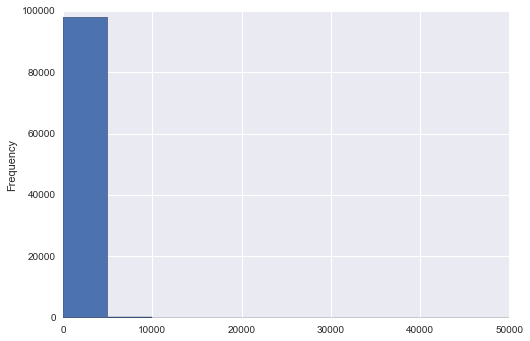

In [7]:
df2.funded_amount.plot(kind='hist')

In [14]:
arr =np.array(df2.funded_amount[df2.funded_amount<=2500])
test=pd.cut(arr,bins=[-0.1,5,250,500,750,1000,1500,2000,2500],labels=['0','<250','<500','<750','<1000','<1500','<2000','<2500'])

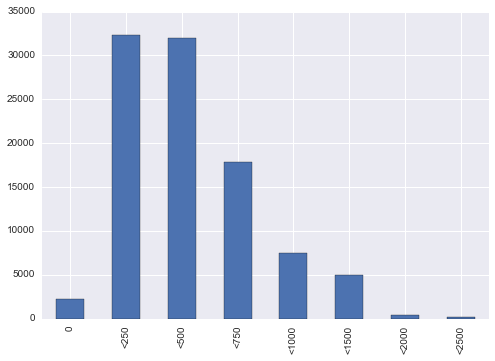

In [15]:
#test.unique()
test.value_counts().plot(kind='bar');

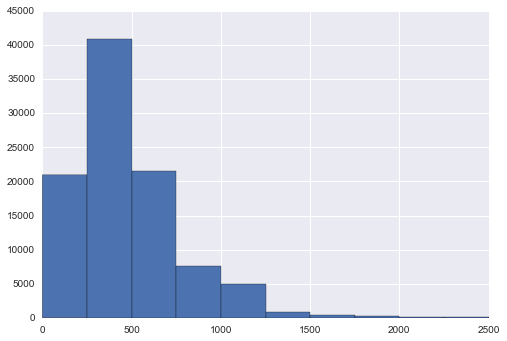

In [11]:
plt.hist(df2.funded_amount[df2.funded_amount<=2500]);

In [1]:
#df2.status.value_counts().plot(kind='bar')
df2.status.value_counts()/df2.status.value_counts().sum()

NameError: name 'df2' is not defined

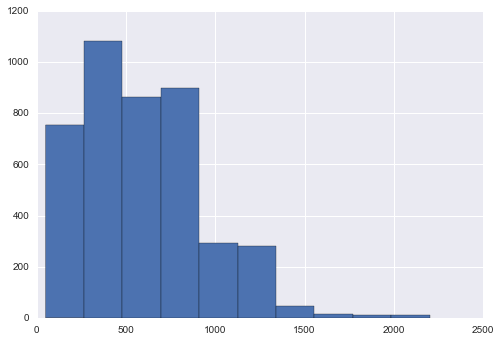

In [17]:
plt.hist(df2.funded_amount[(df2.funded_amount<=2500)&(df2.status=='defaulted')]);

In [18]:
len(df2.activity.value_counts())

143

In [19]:
len(df2)

98119

In [20]:
df3=df2[df2.funded_amount<=2500]
len(df3)

97512

In [13]:
arr =np.array(df3.funded_amount)

In [14]:
len(arr)

97492

In [15]:

df3.binned=pd.cut(arr,bins=[-0.1,5,250,500,750,1000,1500,2000,2500],labels=['0','<250','250-500','500-750','750-1000',
                                                                           '100-1500','1500-2000','2000-2500'])

In [20]:
#df3.binned.value_counts()
df3.head()

,activity,basket_amount,bonus_credit_eligibility,borrowers,country,country_code,currency_exchange_loss_amount,delinquent,description,funded_amount,...,texts.id,texts.mn,texts.pt,texts.ru,texts.vi,themes,town,translator,use,video
0,Motorcycle Transport,None,False,"[{u'gender': u'M', u'first_name': u'Victor', u...",Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Vi...",0,...,NaN,NaN,NaN,NaN,NaN,None,Matuu,"{u'image': 1109275, u'byline': u'Christine Bru...",to buy another motorcycle,None
57,Butcher Shop,None,False,"[{u'gender': u'M', u'first_name': u'Francis', ...",Kenya,KE,1.74,None,"{u'languages': [u'en'], u'texts': {u'en': u'Fr...",1000,...,NaN,NaN,NaN,NaN,NaN,None,Kisii,"{u'image': None, u'byline': u'Alice Lee'}",To expand his butcher shop.,None
78,Clothing Sales,None,False,"[{u'gender': u'F', u'first_name': u'Maureen', ...",Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Ma...",575,...,NaN,NaN,NaN,NaN,NaN,None,None,"{u'image': 1324922, u'byline': u'Laurie Russe...",to buy clothes for sale.,None
81,Fruits & Vegetables,None,False,"[{u'gender': u'F', u'first_name': u' Agnes', u...",Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Ag...",450,...,NaN,NaN,NaN,NaN,NaN,None,Thika,"{u'image': 1324922, u'byline': u'Laurie Russe...","to buy kale, cabbages and green maize to add t...",None
152,General Store,None,False,"[{u'gender': u'M', u'first_name': u'Reuben Mwi...",Kenya,KE,NaN,None,"{u'languages': [u'en'], u'texts': {u'en': u'Re...",500,...,NaN,NaN,NaN,NaN,NaN,None,Kwan-Njenga,"{u'image': None, u'byline': u'Brett & Margaret...",To add more stock.,None


In [22]:
df4=df3.groupby([df3.activity,df3.binned]).size()

In [26]:
df4.head(40)

activity                   
Agriculture       0             123
                  <250          836
                  250-500      1252
                  500-750       656
                  750-1000      615
                  100-1500      557
                  1500-2000      78
                  2000-2500      19
Air Conditioning  0               1
Animal Sales      0              15
                  <250          240
                  250-500       290
                  500-750       184
                  750-1000       36
                  100-1500       24
Arts              <250           22
                  250-500        52
                  500-750         5
                  750-1000        4
                  100-1500        6
Auto Repair       0               3
                  <250           52
                  250-500        29
                  500-750        13
                  750-1000       15
                  100-1500       10
Bakery            0              10


In [27]:
df3.groupby(['activity']).size()

activity
Agriculture                     4136
Air Conditioning                   1
Animal Sales                     789
Arts                              89
Auto Repair                      122
Bakery                           228
Barber Shop                      363
Beauty Salon                    1830
Bicycle Repair                    90
Bicycle Sales                     17
Blacksmith                       115
Bookbinding                        3
Bookstore                        104
Bricks                           156
Butcher Shop                     823
Cafe                             924
Call Center                       31
Carpentry                        481
Catering                          46
Cattle                           278
Cement                            11
Cereals                         2709
Charcoal Sales                  1917
Child Care                        14
Cloth & Dressmaking Supplies      95
Clothing                         659
Clothing Sales               